In [5]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Det analytiske utrykket represeterer en eksponentiell avtagning fra en startverdi N. N opptrer kun som en faktor i funksjonsutrykket, så det påvirker ikke selve formen på den eksponentielle kurven. Jo større absoluttveriden til eksponenten er jo raskere skjer avtagningen. Om vi velger å representere hvor lang tid det tar før et antall lopper har byttet, eller omvendt hvor mange som hopper pr. tidsdelimeter, skal det påvirke denne eksponenten. Det er logisk at c skal avhenge av denne verdien. Det er også foreslått at dette antallet skal ses i sammenheng av total populasjon. Et tall 1000 hoppere kan høres mye ut, men ikke om vi ser på 1000 ut av 1 million. Derfor om 1 loppe hopper i løpet av dt kan vi utrykke c som 1/N. 

# Analytisk del 

In [6]:
N = 10 #[total number of fleees]
dt = 1 #[s]
c = dt/N #migration rate constant
T = 30 #timestamp (final measurement)
#index {s, m, l}: small, medium, large N value

def Population_A(N, t, c):
    return N*(1+np.exp(-2*c*t))/2

N = 10
t_vals = np.arange(0, T+1, dt)
N_a_vals_s = np.array([])
N_b_vals_s = np.array([])
for t in t_vals:
    N_a = Population_A(N, t, c)
    N_a_vals_s = np.append(N_a_vals_s, N_a)
    N_b_vals_s = np.append(N_b_vals_s, N-N_a)

N = 500
N_a_vals_m = np.array([])
N_b_vals_m = np.array([])
for t in t_vals:
    N_a = Population_A(N, t, c)
    N_a_vals_m = np.append(N_a_vals_m, N_a)
    N_b_vals_m = np.append(N_b_vals_m, N-N_a)

N = 10000
N_a_vals_l = np.array([])
N_b_vals_l = np.array([])
for t in t_vals:
    N_a = Population_A(N, t, c)
    N_a_vals_l = np.append(N_a_vals_l, N_a)
    N_b_vals_l = np.append(N_b_vals_l, N-N_a)

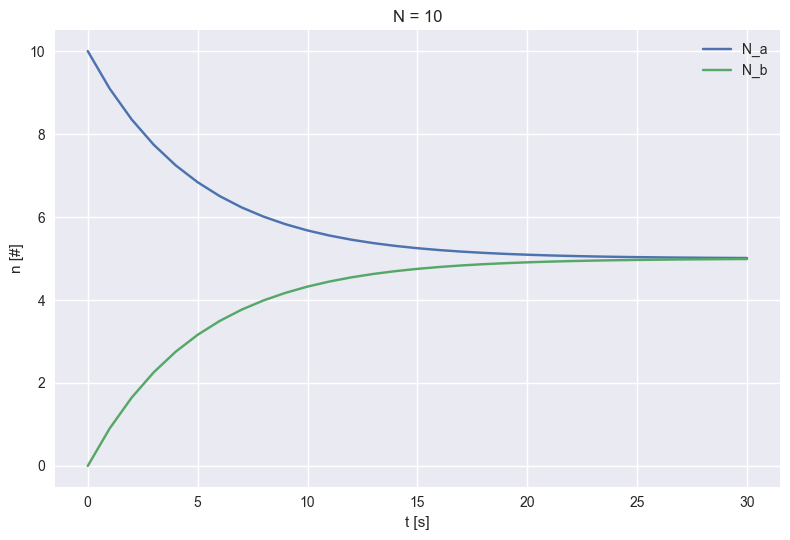

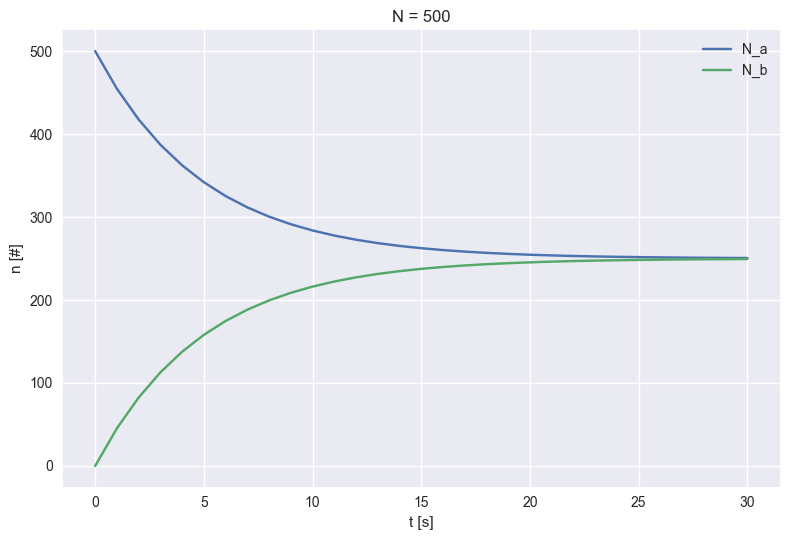

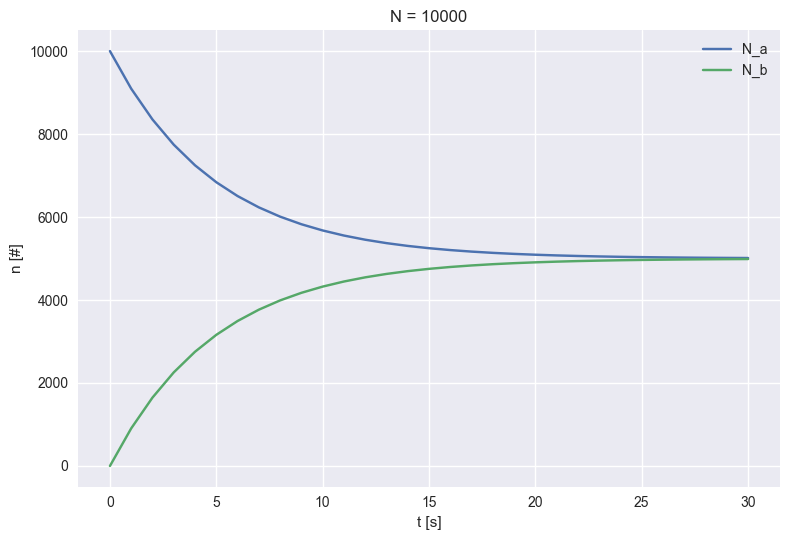

In [7]:
#Visualisering
plt.style.use("seaborn")
plt.rcParams['figure.dpi'] = 100

fig1, (ax1) = plt.subplots(nrows = 1, ncols = 1)
fig2, (ax2) = plt.subplots(nrows = 1, ncols = 1)
fig3, (ax3) = plt.subplots(nrows = 1, ncols = 1)

ax1.plot(t_vals, N_a_vals_s, label = "N_a")
ax1.plot(t_vals, N_b_vals_s, label = "N_b")
ax1.set_title("N = 10")
ax1.set_xlabel("t [s]")
ax1.set_ylabel("n [#]")
ax1.legend()

ax2.plot(t_vals, N_a_vals_m, label = "N_a")
ax2.plot(t_vals, N_b_vals_m, label = "N_b")
ax2.set_title("N = 500")
ax2.set_xlabel("t [s]")
ax2.set_ylabel("n [#]")
ax2.legend()

ax3.plot(t_vals, N_a_vals_l, label = "N_a")
ax3.plot(t_vals, N_b_vals_l, label = "N_b")
ax3.set_title("N = 10000")
ax3.set_xlabel("t [s]")
ax3.set_ylabel("n [#]")
ax3.legend()

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
plt.show()

# Numerisk del

In [8]:
def num_calc(N, rat_A, rat_B, T, dt, R):
    N_A = rat_A * N
    N_B = rat_B * N
    N_A_vals = np.zeros(T)
    N_A_vals[0] = N_A
    N_B_vals = np.zeros(T)
    N_B_vals[0] = N_B
    T_R = T*R

    Lopper_distribution = np.append(np.ones(int(N_B)), np.zeros(int(N_A)))
    jumps = np.random.randint(0, N, T_R)
    for i in range(1, len(jumps)):
        Lopper_distribution[jumps[i]] = abs(Lopper_distribution[jumps[i]]-1)
        if i % R == 0: 
            N_B_vals[int(i/R)] = (sum(Lopper_distribution))
            N_A_vals[int(i/R)] = (N - N_B_vals[int(i/R)])
    t_vals_num = np.arange(0, T, dt)

    return t_vals_num, N_A_vals, N_B_vals

In [9]:
"""
numerisk metode demonstrerer progresjon for veldig liten, middles og stort antall lopper
her bruker jeg noen nye argumenter: T og R (disse demonstreres også lenger nede):
rat - startfordeling default: alle loppene er på A
T bestemmer lengden på x aksen og dermed hvor lenge vi studerer populasjonene
R er antallet hoppere pr dt. Default verdien i oppgaven er 1, men lenger nede i koden ser vi hva som skjer når dette tallet er større
"""

rat_A = 1
rat_B = 0
T = 500
dt = 1 
R = 10

N = 10
t_vals_num, N_A_vals_s, N_B_vals_s = num_calc(N, rat_A, rat_B, T, dt, R) 

N = 500
t_vals_num, N_A_vals_m, N_B_vals_m = num_calc(N, rat_A, rat_B, T, dt, R) 

N = 10000
t_vals_num, N_A_vals_l, N_B_vals_l = num_calc(N, rat_A, rat_B, T, dt, R) 

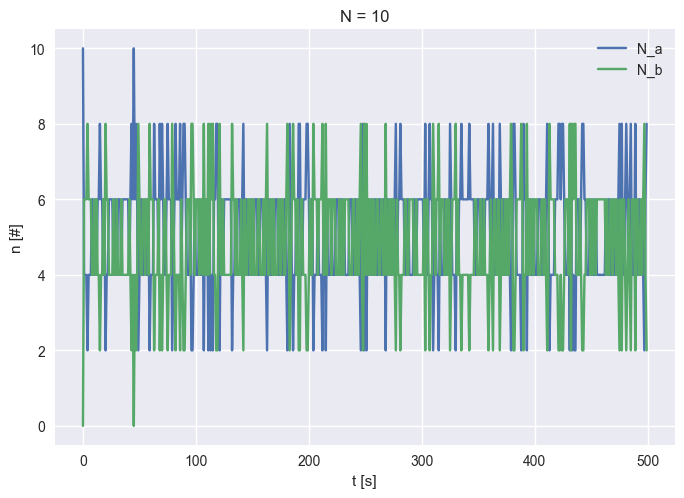

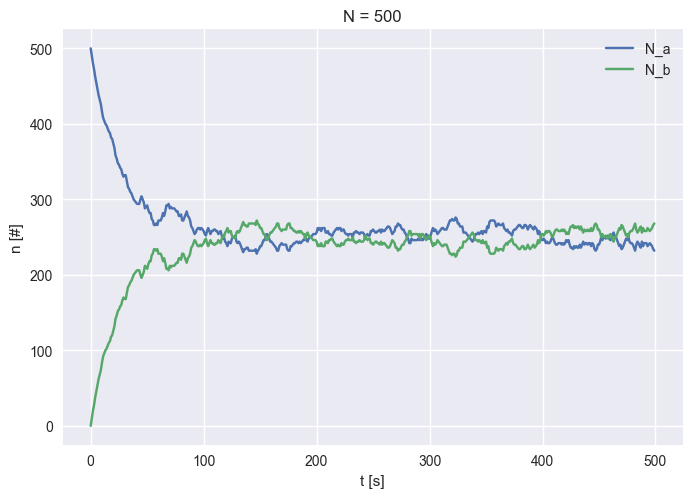

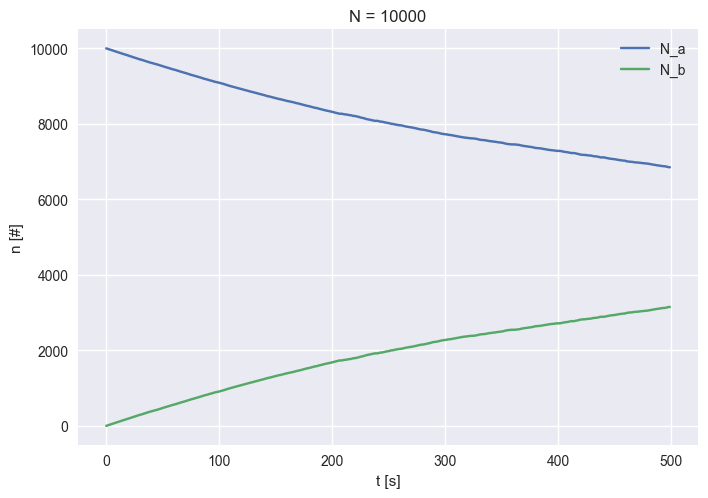

In [10]:
#Visualisering
plt.style.use("seaborn")
plt.rcParams['figure.dpi'] = 100

fig4, (ax1) = plt.subplots(nrows = 1, ncols = 1)
fig5, (ax2) = plt.subplots(nrows = 1, ncols = 1)
fig6, (ax3) = plt.subplots(nrows = 1, ncols = 1)

ax1.plot(t_vals_num, N_A_vals_s, label = "N_a")
ax1.plot(t_vals_num, N_B_vals_s, label = "N_b")
ax1.set_title("N = 10")
ax1.set_xlabel("t [s]")
ax1.set_ylabel("n [#]")
ax1.legend()

ax2.plot(t_vals_num, N_A_vals_m, label = "N_a")
ax2.plot(t_vals_num, N_B_vals_m, label = "N_b")
ax2.set_title("N = 500")
ax2.set_xlabel("t [s]")
ax2.set_ylabel("n [#]")
ax2.legend()

ax3.plot(t_vals_num, N_A_vals_l, label = "N_a")
ax3.plot(t_vals_num, N_B_vals_l, label = "N_b")
ax3.set_title("N = 10000")
ax3.set_xlabel("t [s]")
ax3.set_ylabel("n [#]")
ax3.legend()

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
plt.show()
plt.show()

Grafene over er ment til å vise at den generelle progresjonen går mot eksponitiell (den analytiske antaglesen). Koden krever midlertidig stor T verdi som virker på litt annen måte enn i den analytiske løsningen. Vi ser at koden er mest optimal for høye N, og er helt ubrukerlig for veldig lave N verider. 

Under viser jeg andre styrker denne numerske metoden har. Et problem i grafene over er at tiden 500s er for kort for at vi kan registrere fullstendig endring, spesielt om N blir veldig stor. Ved å sette T høyere får vi graflagt en lenger periode. En annen ting som kan gjøres er å gjøre det mulig for flere enn 1 loppe å hoppe per dt. Gjør vi R veriden stor (ikke engang veldig stor) klarer vi å registrere en større nedgang med kortere tidsintervall og spare minneplass ;)

In [11]:
#holder N, ratio_A, ratio_B og dt konstant

N = 1000
rat_A = 1
rat_B = 0
dt = 1 

# endrer T

T = 100
R = 1
t_vals_num_1, N_A_vals_1, N_B_vals_1 = num_calc(N, rat_A, rat_B, T, dt, R) 

T = 1000
R = 1
t_vals_num_2, N_A_vals_2, N_B_vals_2 = num_calc(N, rat_A, rat_B, T, dt, R) 

#endrer R

T = 500
R = 10
t_vals_num_3, N_A_vals_3, N_B_vals_3 = num_calc(N, rat_A, rat_B, T, dt, R) 

T = 500
R = 50
t_vals_num_4, N_A_vals_4, N_B_vals_4 = num_calc(N, rat_A, rat_B, T, dt, R) 

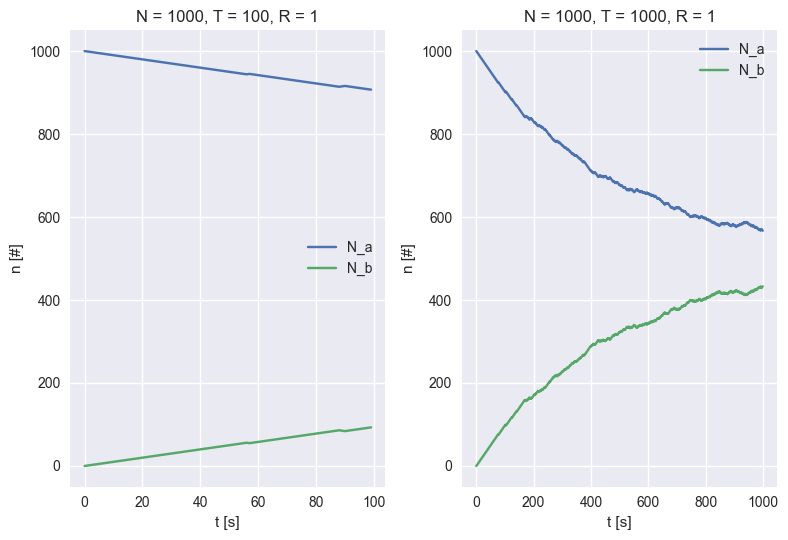

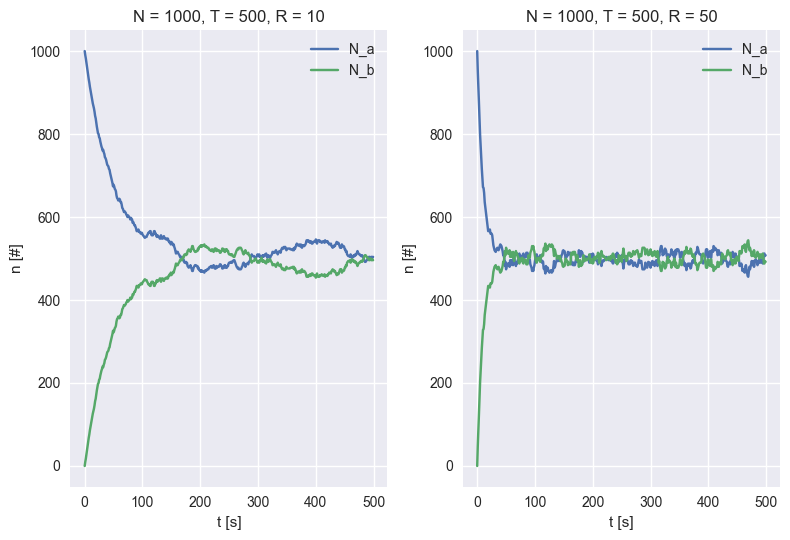

In [12]:
#Visualisering
plt.style.use("seaborn")
plt.rcParams['figure.dpi'] = 100

fig7, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig8, (ax3, ax4) = plt.subplots(nrows = 1, ncols = 2)

ax1.plot(t_vals_num_1, N_A_vals_1, label = "N_a")
ax1.plot(t_vals_num_1, N_B_vals_1, label = "N_b")
ax1.set_title("N = 1000, T = 100, R = 1")
ax1.set_xlabel("t [s]")
ax1.set_ylabel("n [#]")
ax1.legend()

ax2.plot(t_vals_num_2, N_A_vals_2, label = "N_a")
ax2.plot(t_vals_num_2, N_B_vals_2, label = "N_b")
ax2.set_title("N = 1000, T = 1000, R = 1")
ax2.set_xlabel("t [s]")
ax2.set_ylabel("n [#]")
ax2.legend()

ax3.plot(t_vals_num_3, N_A_vals_3, label = "N_a")
ax3.plot(t_vals_num_3, N_B_vals_3, label = "N_b")
ax3.set_title("N = 1000, T = 500, R = 10")
ax3.set_xlabel("t [s]")
ax3.set_ylabel("n [#]")
ax3.legend()

ax4.plot(t_vals_num_4, N_A_vals_4, label = "N_a")
ax4.plot(t_vals_num_4, N_B_vals_4, label = "N_b")
ax4.set_title("N = 1000, T = 500, R = 50")
ax4.set_xlabel("t [s]")
ax4.set_ylabel("n [#]")
ax4.legend()

fig7.tight_layout()
fig8.tight_layout()
plt.show()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b7cfc88-1a88-470f-b09e-d9dcf3e47ae7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>